### Failing

ugropy may fail to obtain the subgroups of a molecule for a certain model for
two reasons: either there is a bug, or the molecule cannot be represented by
the subgroups of the failing model.

ugropy utilizes SMARTS for the representation of functional groups to inquire
whether the molecule contains those structures. Let's examine the functional
group list for the classic liquid-vapor UNIFAC model.

In [1]:
from ugropy import constants

constants.unifac_subgroups

,smarts,contribute,composed,subgroup_number,main_group,R,Q,molecular_weight
group,,,,,,,,
CH3,[CX4H3],"{""CH3"": 1}",n,1,1,0.9011,0.848,15.03500
CH2,[CX4H2],"{""CH2"": 1}",n,2,1,0.6744,0.540,14.02700
CH,[CX4H],"{""CH"": 1}",n,3,1,0.4469,0.228,13.01900
C,[CX4H0],"{""C"": 1}",n,4,1,0.2195,0.000,12.01100
CH2=CH,[CH2]=[CH],"{""CH2=CH"": 1}",n,5,2,1.3454,1.176,27.04600
...,...,...,...,...,...,...,...,...
NCO,[NX2H0]=[CX2H0]=[OX1H0],"{""NCO"": 1}",n,109,51,1.0567,0.732,42.01700
(CH2)2SU,[CH2]S(=O)(=O)[CH2],"{""(CH2)2SU"": 1, ""CH2"": -1, ""CH2S"": -1}",n,118,55,2.6869,2.120,92.11620
CH2CHSU,[CH2]S(=O)(=O)[CH],"{""CH2CHSU"": 1, ""CH"": -1, ""CH2S"": -1}",n,119,55,2.4595,1.808,91.10840


For example, let's check the SMARTS representation of the alcohol group OH:

In [2]:
constants.unifac_subgroups.loc["OH"]

smarts              [OH]([#6,Si])
contribute              {"OH": 1}
composed                        n
subgroup_number                14
main_group                      5
R                             1.0
Q                             1.2
molecular_weight           17.007
Name: OH, dtype: object

The SMARTS representation it's telling us that the OH group it's, of course, a
hydroxyl group bounded by a single aliphatic bound to either an aliphatic
silicon or carbon atom. Then, if we try to get the UNIFAC groups for a molecule
like hydrogen peroxide:

In [3]:
from ugropy import get_unifac_groups

get_unifac_groups("hydrogen peroxide")

{}

The library "fails" to obtain any functional groups to accurately represent the
molecule. This failure is represented by an empty dictionary. In this case, the
"fail" is intentional, but it could fail due to errors in the groups SMARTS
representations or the algorithm, resulting in an empty dictionary as well.
Currently, the supported models are tested against the following numbers of
molecules:

- Classic liquid-vapor UNIFAC: 406
- Predictive Soave-Redlich-Kwong (PSRK): 440
- Joback: 285

If you encounter a failing representation, you can examine the structure of the
molecule and the list of functional groups of the failing model. If you
determine that the molecule can indeed be modeled, you may have discovered a
bug. Feel free to report the issue on the repository along with this
information.

#### More than one solution
Models like UNIFAC or PSRK can have multiple solutions to represent a molecule,
and ugropy tries its best to find them all. In such cases, you will receive a
list of dictionaries, each containing one of the solutions found. Let's take a
look.

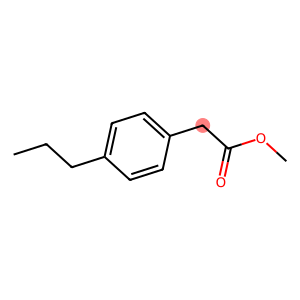

In [4]:
from ugropy import Groups
from rdkit.Chem import Draw


mol = Groups("CCCC1=CC=C(CC(=O)OC)C=C1", "smiles")

Draw.MolToImage(mol.chem_object, highlightAtoms=[7])

This molecule can be modeled in two ways depending on how we treat the CH2
attached to the ring and the ester carbon (highlighted in red). We can either
form an ACCH2 group and model the ester group with COO, or we can use an AC
group and model the ester group with CH2COO.

In [5]:
print("UNIFAC:")
print(mol.unifac_groups)
print("PSRK:")
print(mol.psrk_groups)

UNIFAC:
[{'CH3': 2, 'ACH': 4, 'ACCH2': 1, 'CH2COO': 1, 'CH2': 1, 'AC': 1}
 {'CH3': 2, 'ACH': 4, 'ACCH2': 2, 'CH2': 1, 'COO': 1}]
PSRK:
[{'CH3': 2, 'ACH': 4, 'ACCH2': 1, 'CH2COO': 1, 'CH2': 1, 'AC': 1}
 {'CH3': 2, 'ACH': 4, 'ACCH2': 2, 'CH2': 1, 'COO': 1}]


This could be useful in cases where some groups have more interaction
parameters than others in the mixture that you want to model with UNIFAC.
Alternatively, you can try both approaches and compare if there are any
differences.